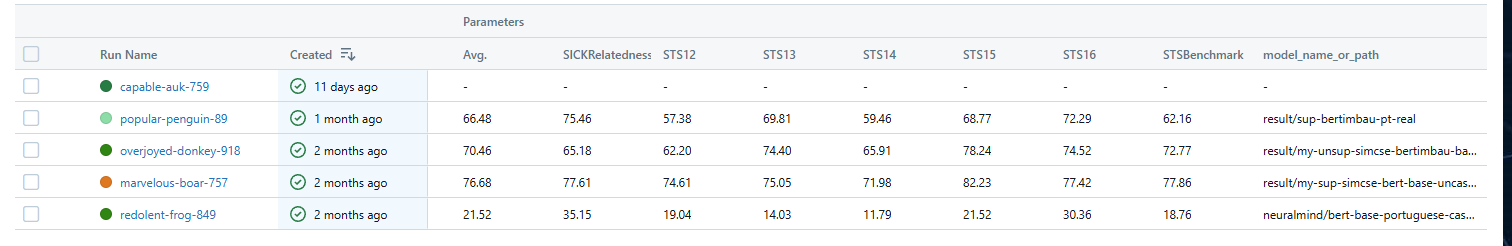

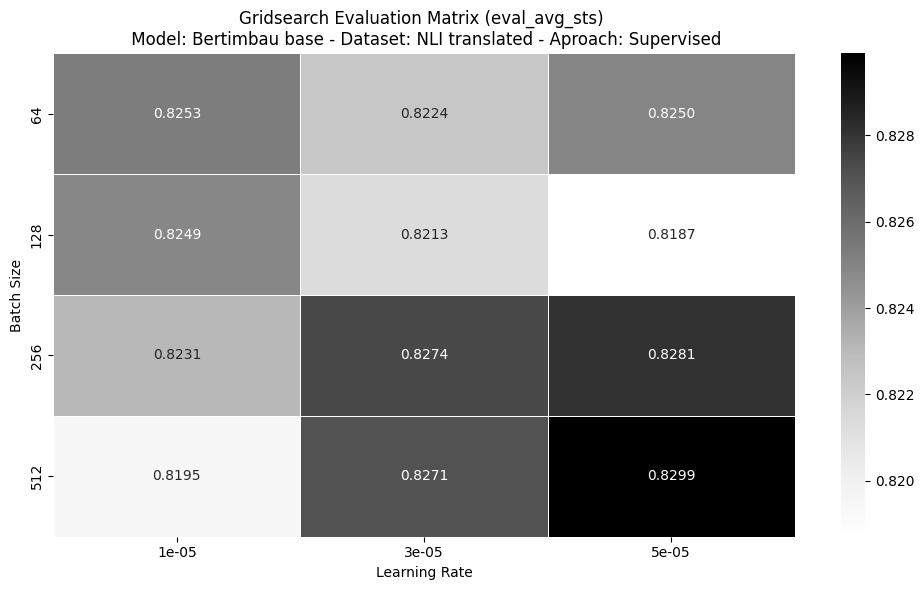

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

# Dados em formato nome_modelo -> eval_avg_sts


def gerar_heat_map(title,raw_data):

    # Lista para armazenar os dados extraídos
    rows = []

    # Regex para extrair lr e bs
    for model_name, score in raw_data.items():
        match = re.search(r'lr([\de-]+)_bs(\d+)', model_name)
        if match:
            lr = match.group(1)
            bs = int(match.group(2))
            rows.append({'learning_rate': lr, 'batch_size': bs, 'eval_avg_sts': score})

    # Cria DataFrame
    df = pd.DataFrame(rows)

    # Converte para matriz (pivot table)
    heatmap_data = df.pivot(index='batch_size', columns='learning_rate', values='eval_avg_sts')
    heatmap_data = heatmap_data.sort_index(ascending=True)

    # Plotando a matriz de calor
    plt.figure(figsize=(10, 6))
    sns.heatmap(heatmap_data, annot=True, fmt=".4f", cmap="Greys", linewidths=0.5)
    plt.title(title)
    plt.xlabel("Learning Rate")
    plt.ylabel("Batch Size")
    plt.tight_layout()
    plt.show()

In [ ]:
raw_data = {
    'sup_bertimbau_dataset_trad_lr5e-05_bs512': 0.8299,
    'sup_bertimbau_dataset_trad_lr5e-05_bs256': 0.8281,
    'sup_bertimbau_dataset_trad_lr3e-05_bs256': 0.8274,
    'sup_bertimbau_dataset_trad_lr3e-05_bs512': 0.8271,
    'sup_bertimbau_dataset_trad_lr1e-05_bs64': 0.8253,
    'sup_bertimbau_dataset_trad_lr5e-05_bs64': 0.8250,
    'sup_bertimbau_dataset_trad_lr1e-05_bs128': 0.8249,
    'sup_bertimbau_dataset_trad_lr1e-05_bs256': 0.8231,
    'sup_bertimbau_dataset_trad_lr3e-05_bs64': 0.8224,
    'sup_bertimbau_dataset_trad_lr3e-05_bs128': 0.8213,
    'sup_bertimbau_dataset_trad_lr1e-05_bs512': 0.8195,
    'sup_bertimbau_dataset_trad_lr5e-05_bs128': 0.8187,
}
gerar_heat_map("Gridsearch Evaluation Matrix (eval_avg_sts) \n Model: Bertimbau base - Dataset: NLI translated - Aproach: Supervised",raw_data)

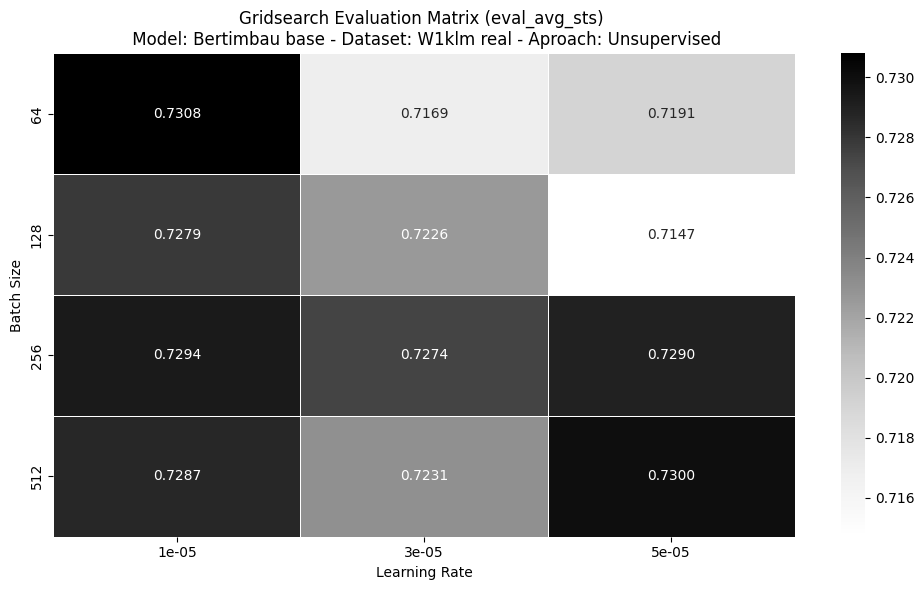

In [9]:
raw_data_unsup = {
    'unsup_bertimbau_dataset_real_lr1e-05_bs64': 0.7308,
    'unsup_bertimbau_dataset_real_lr5e-05_bs512': 0.7300,
    'unsup_bertimbau_dataset_real_lr1e-05_bs256': 0.7294,
    'unsup_bertimbau_dataset_real_lr5e-05_bs256': 0.7290,
    'unsup_bertimbau_dataset_real_lr1e-05_bs512': 0.7287,
    'unsup_bertimbau_dataset_real_lr1e-05_bs128': 0.7279,
    'unsup_bertimbau_dataset_real_lr3e-05_bs256': 0.7274,
    'unsup_bertimbau_dataset_real_lr3e-05_bs512': 0.7231,
    'unsup_bertimbau_dataset_real_lr3e-05_bs128': 0.7226,
    'unsup_bertimbau_dataset_real_lr5e-05_bs64': 0.7191,
    'unsup_bertimbau_dataset_real_lr3e-05_bs64': 0.7169,
    'unsup_bertimbau_dataset_real_lr5e-05_bs128': 0.7147,
}
gerar_heat_map("Gridsearch Evaluation Matrix (eval_avg_sts) \n Model: Bertimbau base - Dataset: W1klm real - Aproach: Unsupervised",raw_data_unsup)